In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

def seed_everything(seed=1234):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

# 1画像だけみて、bboxからクロップして描画・保存
def show_cropped_bboxes(image_filename, train_meta, DATA_DIR, save_dir=None):
    # この画像のメタデータをフィルタリング
    bboxes = train_meta[train_meta['image_path'] == image_filename]

    # label_idでソート
    bboxes = bboxes.sort_values(by='label_id')

    if bboxes.empty:
        print(f"No metadata found for {image_filename}")
        return

    image_path = os.path.join(DATA_DIR, 'images', image_filename)
    img = cv2.imread(image_path)

    if img is None:
        print(f"Image not found: {image_path}")
        return

    # matplotlib用にBGRをRGBに変換
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    print(f"Found {len(bboxes)} bounding boxes for {image_filename}")

    plt.figure(figsize=(15, 5))

    # バウンディングボックス付きの元の画像を表示
    plt.subplot(1, len(bboxes) + 1, 1)
    img_with_box = img_rgb.copy()
    for _, row in bboxes.iterrows():
        if not pd.isna(row['x']):
            x, y, w, h = int(row['x']), int(row['y']), int(row['w']), int(row['h'])
            cv2.rectangle(img_with_box, (x, y), (x + w, y + h), (0, 255, 0), 2)
            if 'label_id' in row and not pd.isna(row['label_id']):
                 cv2.putText(img_with_box, str(int(row['label_id'])), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    plt.imshow(img_with_box)
    plt.title("Original Image with BBoxes")
    plt.axis('off')

    # クロップ画像を表示
    for i, (_, row) in enumerate(bboxes.iterrows()):
        if pd.isna(row['x']):
            continue

        x, y, w, h = int(row['x']), int(row['y']), int(row['w']), int(row['h'])

        # 座標が画像の範囲内にあることを確認
        y1 = max(0, y)
        y2 = min(img.shape[0], y + h)
        x1 = max(0, x)
        x2 = min(img.shape[1], x + w)

        crop = img_rgb[y1:y2, x1:x2]

        plt.subplot(1, len(bboxes) + 1, i + 2)
        plt.imshow(crop)
        label = int(row['label_id']) if 'label_id' in row and not pd.isna(row['label_id']) else 'N/A'
        plt.title(f"Label: {label}\n{w}x{h}")
        plt.axis('off')

    plt.tight_layout()

    # 描画結果を保存
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
        base_name = os.path.splitext(image_filename)[0]
        save_path = os.path.join(save_dir, f"{base_name}_result.png")
        plt.savefig(save_path)
        print(f"Saved result to {save_path}")

    plt.show()

# 画像パスを構築する関数
def get_image_path(row):
    # Format: {quarter}__{angle}__{session:02d}__{frame:02d}.jpg
    return f"{row['quarter']}__{row['angle']}__{row['session']:02d}__{row['frame']:02d}.jpg"




Found 10 bounding boxes for Q2-008__side__00__16.jpg
Saved result to cropped_images/Q2-008__side__00__16_result.png


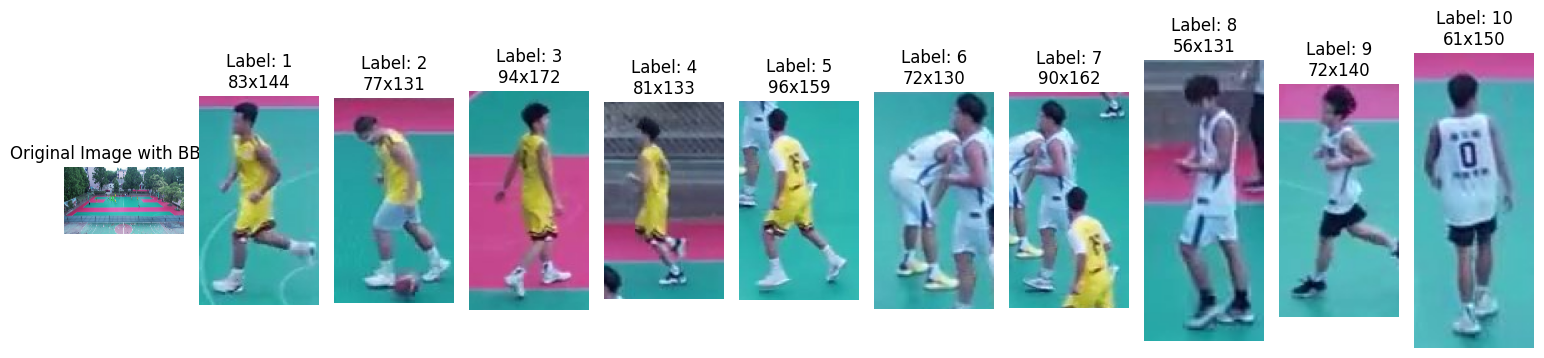

Found 10 bounding boxes for Q2-007__side__00__36.jpg
Saved result to cropped_images/Q2-007__side__00__36_result.png


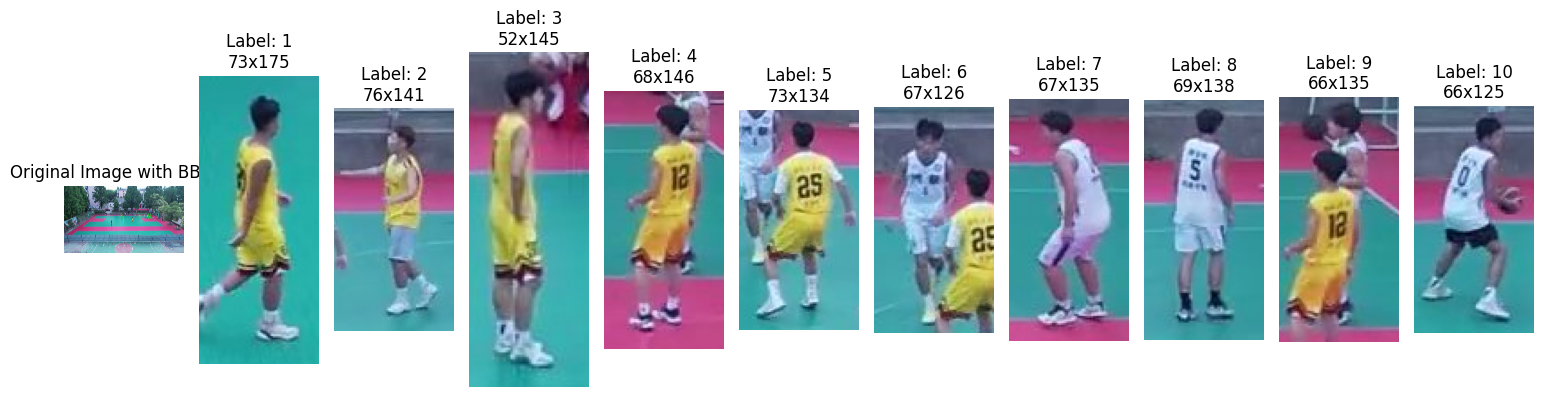

Found 10 bounding boxes for Q2-019__side__00__35.jpg
Saved result to cropped_images/Q2-019__side__00__35_result.png


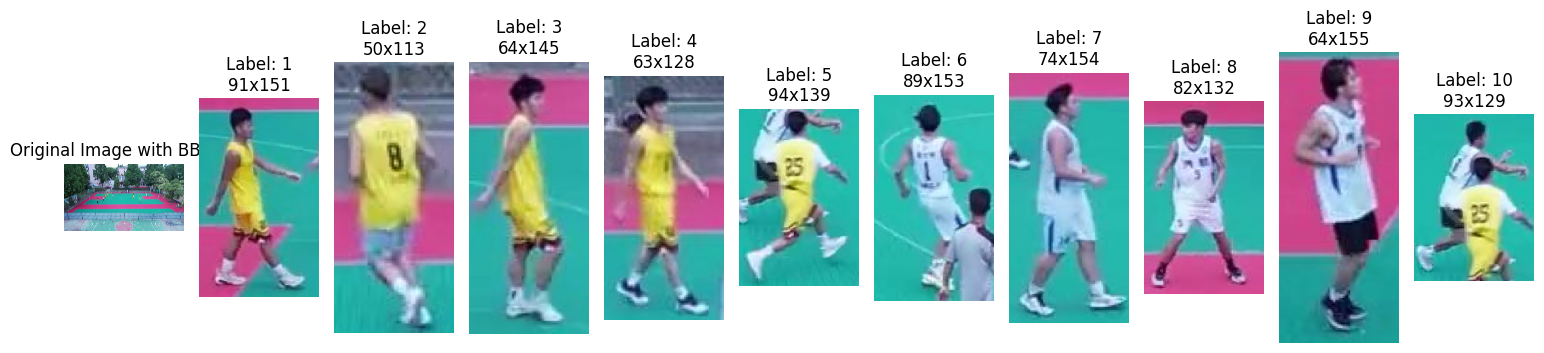

Found 10 bounding boxes for Q2-017__side__00__13.jpg
Saved result to cropped_images/Q2-017__side__00__13_result.png


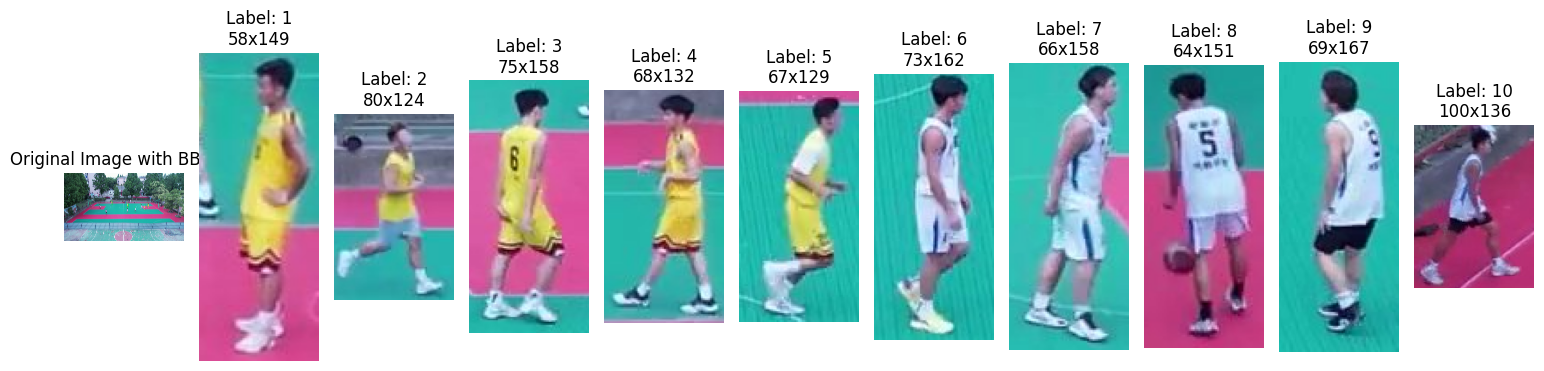

Found 10 bounding boxes for Q2-015__side__00__39.jpg
Saved result to cropped_images/Q2-015__side__00__39_result.png


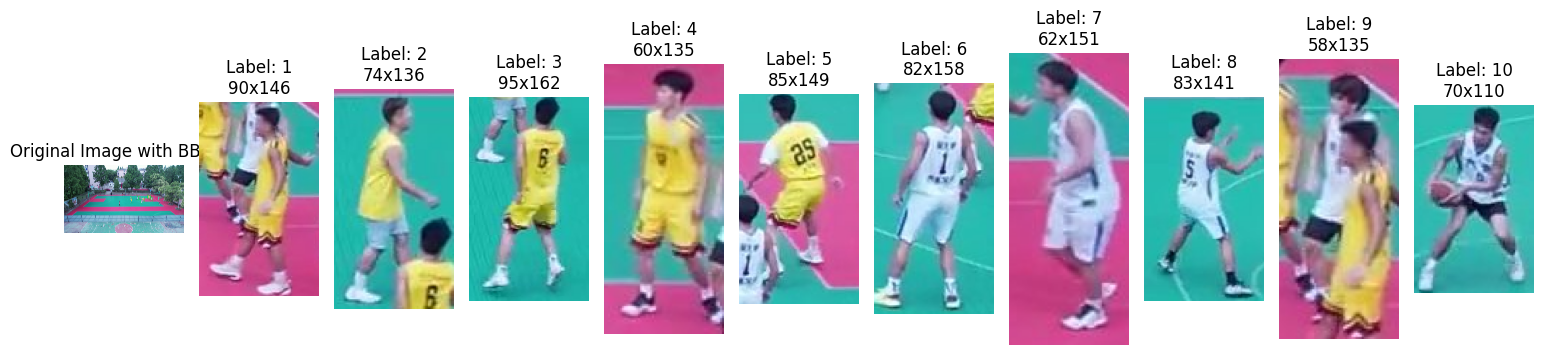

In [9]:

seed_everything()

DATA_DIR = '../inputs'
TRAIN_META_PATH = os.path.join(DATA_DIR, 'atmaCup22_metadata/train_meta.csv')
train_meta = pd.read_csv(TRAIN_META_PATH)
train_meta['image_path'] = train_meta.apply(get_image_path, axis=1)

# バウンディングボックスを持つサンプル画像を選択
sample_image = train_meta[train_meta['label_id'].notna()]['image_path'].unique()

# ランダムで5画像を表示・保存
random.shuffle(sample_image)

SAVE_DIR = 'cropped_images' # 保存先ディレクトリ
for img in sample_image[:5]:
    show_cropped_bboxes(img, train_meta=train_meta, DATA_DIR=DATA_DIR, save_dir=SAVE_DIR)

Found 10 bounding boxes for Q4-013__side__03__02.jpg
Saved result to cropped_images/Q4-013__side__03__02_result.png


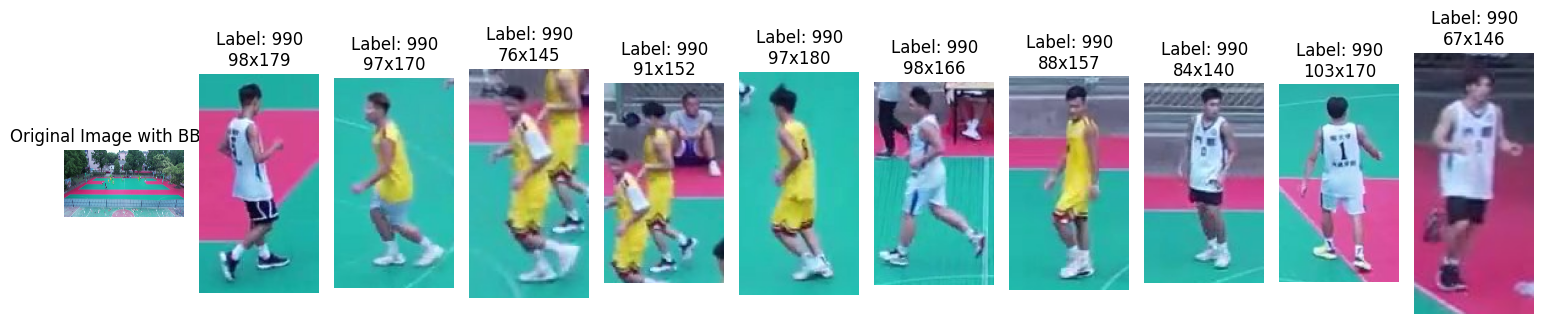

Found 10 bounding boxes for Q4-006__side__03__04.jpg
Saved result to cropped_images/Q4-006__side__03__04_result.png


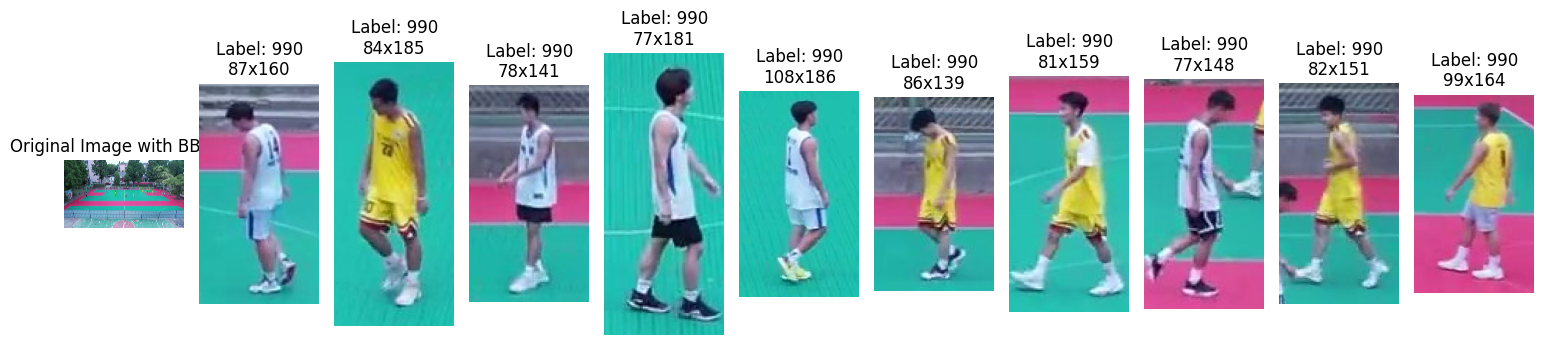

Found 10 bounding boxes for Q4-013__side__03__09.jpg
Saved result to cropped_images/Q4-013__side__03__09_result.png


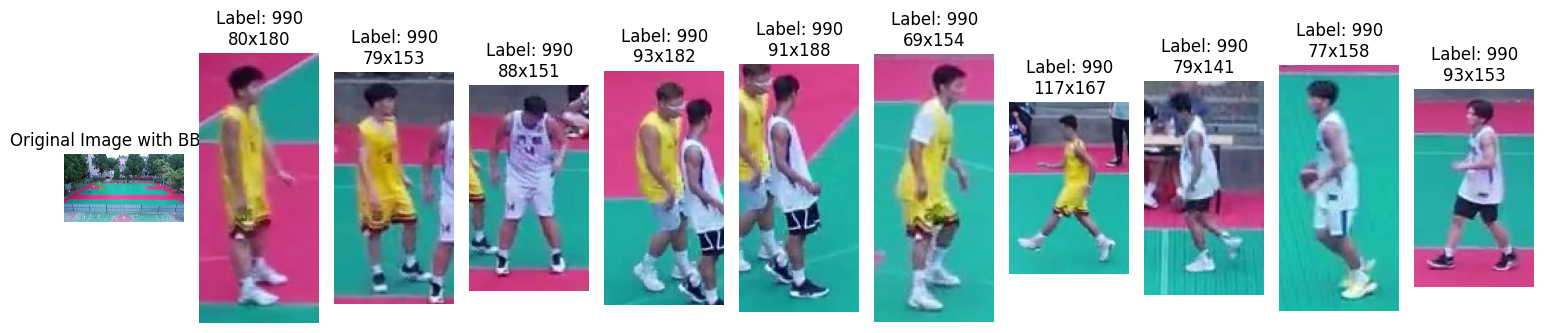

Found 10 bounding boxes for Q4-000__side__00__02.jpg
Saved result to cropped_images/Q4-000__side__00__02_result.png


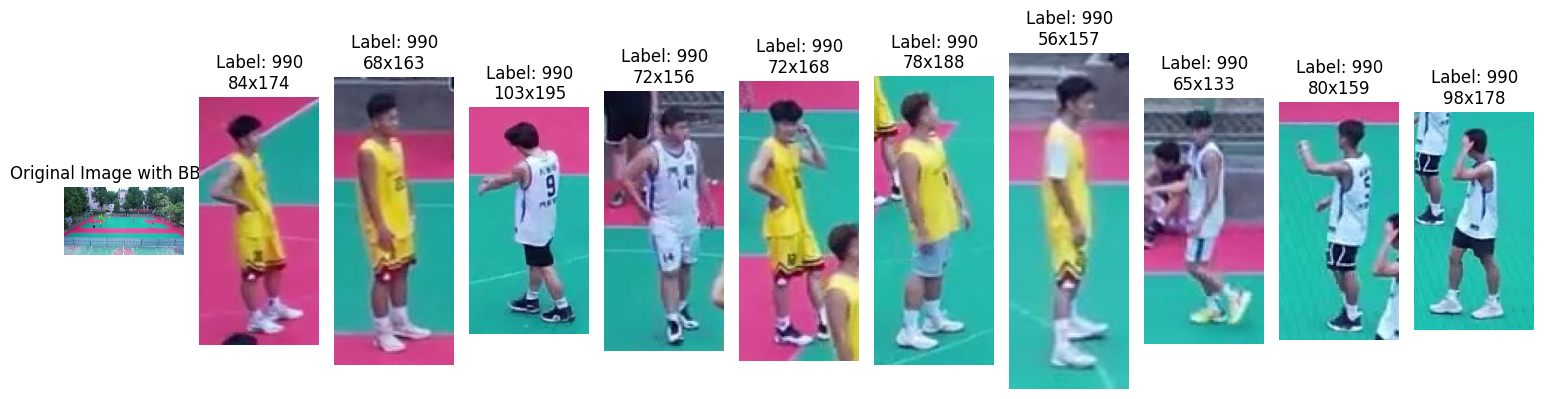

Found 10 bounding boxes for Q4-010__side__01__01.jpg
Saved result to cropped_images/Q4-010__side__01__01_result.png


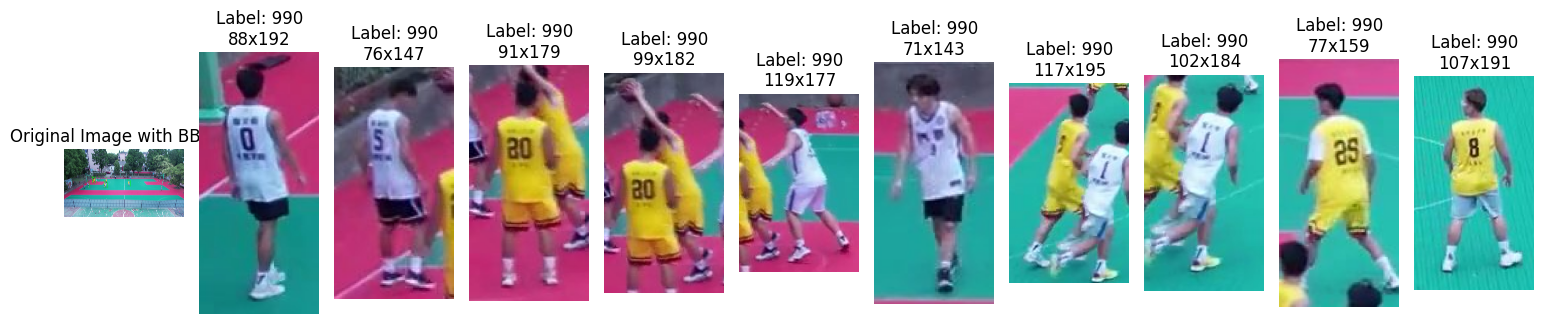

In [11]:
TEST_META_PATH = os.path.join(DATA_DIR, 'atmaCup22_metadata/test_meta.csv')

test_meta = pd.read_csv(TEST_META_PATH)
test_meta['image_path'] = test_meta.apply(get_image_path, axis=1)
test_meta['label_id'] = 990
# バウンディングボックスを持つサンプル画像を選択
sample_image = test_meta[test_meta['label_id'].notna()]['image_path'].unique()

# ランダムで5画像を表示・保存
random.shuffle(sample_image)

SAVE_DIR = 'cropped_images' # 保存先ディレクトリ
for img in sample_image[:5]:
    show_cropped_bboxes(img, train_meta=test_meta, DATA_DIR=DATA_DIR, save_dir=SAVE_DIR)

In [13]:
train_meta['label_id'].unique(), train_meta['label_id'].nunique()

(array([ 0,  6,  2,  1,  7,  3,  8,  4, 10,  9,  5]), 11)

In [17]:
test_top_meta = pd.read_csv(os.path.join(DATA_DIR, 'atmaCup22_metadata/test_top_meta.csv'))
test_meta["angle"].value_counts(), test_top_meta["angle"].value_counts()


(angle
 side    7500
 Name: count, dtype: int64,
 angle
 top    1480
 Name: count, dtype: int64)

In [15]:
train_meta["angle"].value_counts()


angle
top     12811
side    12109
Name: count, dtype: int64